# Proyek Klasifikasi Gambar: Flower-Dataset
- **Nama:** Daniela Natali Putri
- **Email:** danielanputri@gmail.com
- **ID Dicoding:** danielanpp

## Import Semua Packages/Library yang Digunakan

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import zipfile

# Import standard libraries
import os
import random
import shutil
import pathlib

from PIL import Image
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np

# Import TensorFlow and Keras libraries
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, Input
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetV2B0, MobileNetV2
from tensorflow.keras.optimizers import Adam

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Loading
Dataset original bersumber dari [Kaggle](https://www.kaggle.com/datasets/marquis03/flower-classification).

In [ ]:
# masukkan kaggle.json (API) milik kalian
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danielaa25","key":"4ebbef24194a0c2bd0b76d41ed9f5d47"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset dari kaggle
!kaggle datasets download -d kausthubkannan/5-flower-types-classification-dataset
# Unzip dataset
!unzip 5-flower-types-classification-dataset.zip -d dataset_folder

Streaming output truncated to the last 5000 lines.
  inflating: dataset_folder/flower_images/Lilly/00048a5c76.jpg  
  inflating: dataset_folder/flower_images/Lilly/001ff6644e.jpg  
  inflating: dataset_folder/flower_images/Lilly/001ff6656j.jpg  
  inflating: dataset_folder/flower_images/Lilly/00973ad1b1.jpg  
  inflating: dataset_folder/flower_images/Lilly/00a7d512d6.jpg  
  inflating: dataset_folder/flower_images/Lilly/00f36a3c40.jpg  
  inflating: dataset_folder/flower_images/Lilly/013628cccc.jpg  
  inflating: dataset_folder/flower_images/Lilly/01998d6fb5.jpg  
  inflating: dataset_folder/flower_images/Lilly/01a0ec319c.jpg  
  inflating: dataset_folder/flower_images/Lilly/01b4bb0289.jpg  
  inflating: dataset_folder/flower_images/Lilly/025ef3ea44.jpg  
  inflating: dataset_folder/flower_images/Lilly/02a7a2df46.jpg  
  inflating: dataset_folder/flower_images/Lilly/02be2ca388.jpg  
  inflating: dataset_folder/flower_images/Lilly/035cce082f.jpg  
  inflating: dataset_folder/flower_imag

In [ ]:
def count_images_resolution(base_path, target_resolution=None):
    # Dictionary untuk menyimpan jumlah gambar per kelas
    class_count = {}

    # Dictionary untuk menyimpan jumlah gambar per resolusi
    resolution_count = {}

    for root, dirs, files in os.walk(base_path):
        # Mengabaikan folder root yang tidak memiliki gambar
        if root == base_path:
            continue
        class_name = os.path.basename(root)
        class_count[class_name] = len(files)

        for file in files:
            file_path = os.path.join(root, file)
            with Image.open(file_path) as img:
                width, height = img.size
                resolution = f"{width}x{height}"
                if resolution not in resolution_count:
                    resolution_count[resolution] = 0
                resolution_count[resolution] += 1

                # Menghitung jumlah gambar dengan resolusi target_resolution
                if target_resolution and resolution == target_resolution:
                    if 'target' not in resolution_count:
                        resolution_count['target'] = 0
                    resolution_count['target'] += 1

    return class_count, resolution_count

# Path ke folder utama
base_path = "dataset_folder/flower_images"

# Resolusi yang ingin dihitung
target_resolution = "256x256"

class_count, resolution_count = count_images_resolution(base_path, target_resolution)

# Menampilkan hasil
print("Jumlah gambar per kelas:")
for class_name, count in class_count.items():
    print(f"{class_name}: {count}")

print("\nJumlah gambar per resolusi:")
for resolution, count in resolution_count.items():
    print(f"{resolution}: {count}")


Jumlah gambar per kelas:
Orchid: 1000
Lilly: 1000
Lotus: 1000
Tulip: 1000
Sunflower: 1000

Jumlah gambar per resolusi:
299x168: 37
800x523: 1
270x270: 1
168x299: 34
262x192: 13
200x355: 6
368x460: 2
225x225: 375
1000x1502: 1
275x183: 573
209x247: 1
480x343: 3
284x177: 144
199x253: 6
1296x1414: 1
284x178: 4
1600x1071: 1
186x270: 1
235x214: 2
512x396: 1
798x418: 3
642x642: 8
276x183: 58
281x179: 7
300x168: 189
1024x1024: 11
183x275: 152
612x408: 55
220x147: 1
1080x675: 5
2560x1600: 12
205x246: 5
375x500: 1
271x186: 12
363x612: 1
259x194: 125
600x900: 5
168x300: 64
910x564: 1
249x203: 3
608x608: 2
1000x1000: 7
600x398: 2
728x691: 1
2902x3410: 1
1200x900: 8
345x264: 1
700x900: 4
600x400: 14
1400x933: 3
1983x1244: 1
183x276: 11
1440x1280: 1
289x175: 3
278x181: 11
173x280: 1
350x144: 2
408x612: 7
180x280: 5
238x212: 6
213x237: 6
729x300: 1
266x190: 12
480x720: 2
223x226: 4
1300x1390: 2
234x216: 2
867x1390: 2
1024x768: 6
522x522: 1
201x251: 30
226x223: 5
228x221: 6
550x309: 1
552x624: 1
1920x

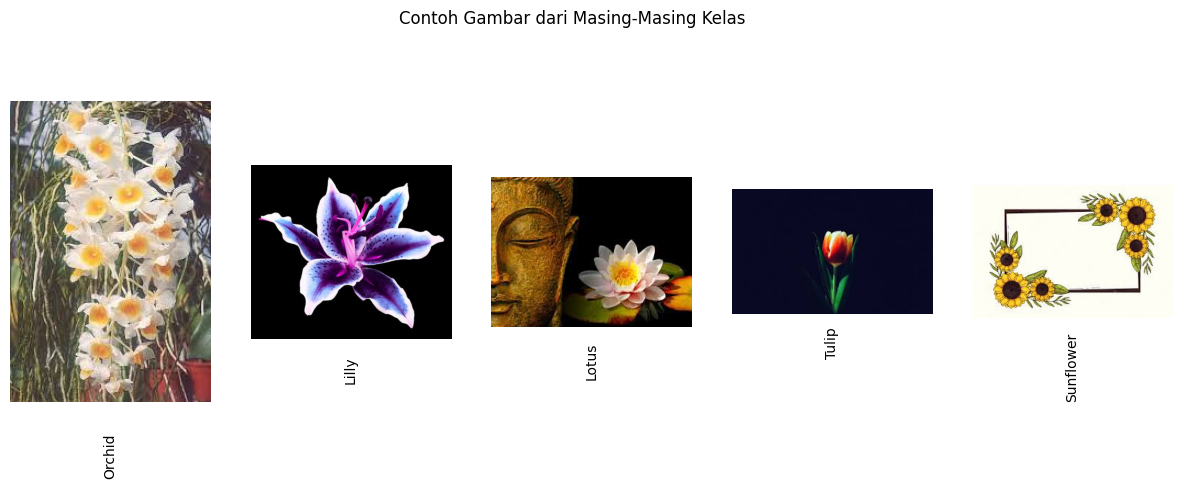

In [ ]:
def example_images(base_path):
    class_images = {}

    for root, dirs, files in os.walk(base_path):
        if files:
            class_name = os.path.basename(root)
            random_image = random.choice(files)
            class_images[class_name] = os.path.join(root, random_image)

    fig, axes = plt.subplots(1, len(class_images), figsize=(15, 5))
    fig.suptitle('Contoh Gambar dari Masing-Masing Kelas')

    for ax, (class_name, image_path) in zip(axes, class_images.items()):
        img = Image.open(image_path)
        ax.imshow(img)
        ax.text(0.5, -0.1, class_name, rotation=90, verticalalignment='top', horizontalalignment='center', transform=ax.transAxes)
        ax.axis('off')

    plt.show()

# Path ke folder utama
base_path = "dataset_folder/flower_images"

example_images(base_path)

## Split Dataset

In [ ]:
# Splitting dataset (Train, Val, Test) dengan proporsi 80:10:10
base_path = "dataset_folder/flower_images"
base_output = 'dataset_split'

split_ratio = {
    'train': 0.8,
    'val': 0.1,
    'test': 0.1
}

# Buat direktori output
for split in ['train', 'val', 'test']:
    for class_name in os.listdir(base_path):
        class_split_path = os.path.join(base_output, split, class_name)
        os.makedirs(class_split_path, exist_ok=True)

# Proses untuk setiap kelas
for class_name in os.listdir(base_path):
    class_path = os.path.join(base_path, class_name)
    if os.path.isdir(class_path):
        all_images = os.listdir(class_path)
        random.shuffle(all_images)

        total = len(all_images)
        train_end = int(total * split_ratio['train'])
        val_end = train_end + int(total * split_ratio['val'])

        train_imgs = all_images[:train_end]
        val_imgs = all_images[train_end:val_end]
        test_imgs = all_images[val_end:]

        # Copy ke folder tujuan
        for img_list, split in zip([train_imgs, val_imgs, test_imgs], ['train', 'val', 'test']):
            for img in img_list:
                src = os.path.join(class_path, img)
                dst = os.path.join(base_output, split, class_name, img)
                shutil.copyfile(src, dst)

print("Dataset berhasil dibagi ke dalam train, val, dan test.")

Dataset berhasil dibagi ke dalam train, val, dan test.


## Modeling

In [ ]:
def augment_and_resize(base_output, img_size=(150, 150), batch_size=32):
    train_path = os.path.join(base_output, 'train')
    test_path = os.path.join(base_output, 'test')
    val_path = os.path.join(base_output, 'val')

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    test_val_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    val_generator = test_val_datagen.flow_from_directory(
        val_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_val_datagen.flow_from_directory(
        test_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    return train_generator, val_generator, test_generator

# Memuat data dari hasil split
train_generator, val_generator, test_generator = augment_and_resize(base_output)


Found 4000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [ ]:
class_indices = train_generator.class_indices
print(class_indices)

{'Lilly': 0, 'Lotus': 1, 'Orchid': 2, 'Sunflower': 3, 'Tulip': 4}


In [ ]:
pre_trained_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(150,150,3))

for layer in pre_trained_model.layers:
    layer.trainable = False

model = Sequential()

model.add(pre_trained_model)

# Menambahkan Conv2D and Pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten(name="flatten"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dense(5, activation='softmax'))

<ipython-input-25-ecc319c962d3>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pre_trained_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(150,150,3))


In [ ]:
# Compile model
optimizer = tf.optimizers.Adam()
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Callbacks
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.97:
            print("\nAkurasi pelatihan dan validasi telah mencapai >97%! Pelatihan dihentikan.")
            self.model.stop_training = True

accuracy_callback = CustomCallback()

checkpoint = ModelCheckpoint(
    'best_flower_model.keras',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[accuracy_callback, checkpoint, early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9436 - loss: 0.1788 - val_accuracy: 0.8640 - val_loss: 0.5560 - learning_rate: 0.0010
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9341 - loss: 0.2092 - val_accuracy: 0.8820 - val_loss: 0.5040 - learning_rate: 0.0010
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.9528 - loss: 0.1485 - val_accuracy: 0.8800 - val_loss: 0.5014 - learning_rate: 0.0010
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.9479 - loss: 0.1706 - val_accuracy: 0.8660 - val_loss: 0.4296 - learning_rate: 0.0010
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 122s 974ms/step - accuracy: 0.9482 - loss: 0.1681 - val_accuracy: 0.8960 - val_loss: 0.4603 - learning_rate: 0.0010
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.9653 - loss: 0.1161 - val_accuracy: 0.9020 - val_loss: 0.4714 - learning_rate: 0.0010
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 889ms/step - accuracy: 0.9587 - loss

## Evaluasi dan Visualisasi

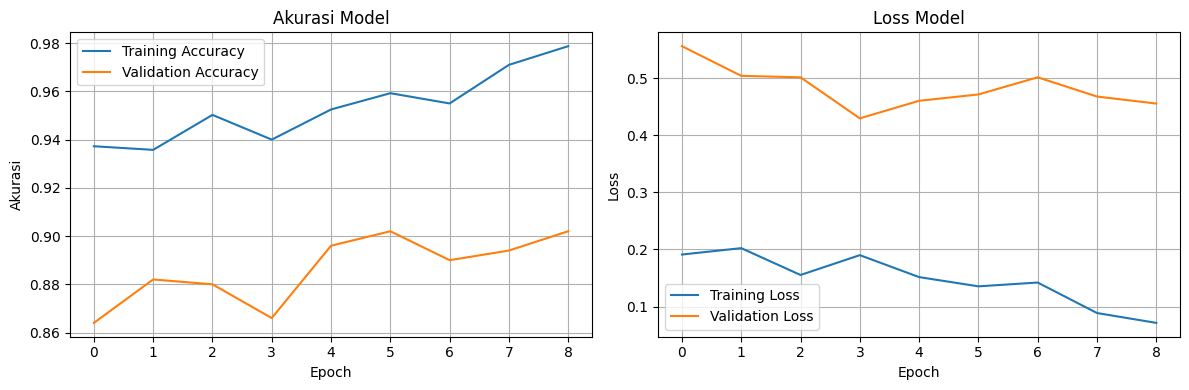

In [ ]:
plt.figure(figsize=(12, 4))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Evaluasi pada training data
train = model.evaluate(train_generator, verbose=0)

# Evaluasi pada validation data
valid = model.evaluate(val_generator, verbose=0)

# Evaluasi pada testing data
test = model.evaluate(test_generator, verbose=0)

# Cetak hasil evaluasi
print()
print(f'Training Accuracy   : {train[1] * 100:.2f}%')
print(f'Validation Accuracy : {valid[1] * 100:.2f}%')
print(f'Testing Accuracy    : {test[1] * 100:.2f}%')


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Training Accuracy   : 97.32%
Validation Accuracy : 90.20%
Testing Accuracy    : 90.40%


## Konversi Model

In [ ]:
# Konversi ke Saved_model
model.export('saved_model')

Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_552')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  135270601981008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270253852816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270253853392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270253853200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270253854160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270253851856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270253852240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270253849744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270253849936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270253852624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135270253848592

### Konversi TFLITE TFJS
Konversi model menjadi format TFLITE TFJS.

In [ ]:
# Konversi ke TFLite
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [
  tf.lite.OpsSet.TFLITE_BUILTINS,
  tf.lite.OpsSet.SELECT_TF_OPS
]
tflite_model = converter.convert()

# Simpan model.tflite
os.makedirs("tflite", exist_ok=True)
with open("tflite/model.tflite", "wb") as f:
    f.write(tflite_model)

labels = ["Lilly", "Lotus", "Orchid", "Sunflower", "Tulip"]
with open("tflite/label.txt", "w") as f:
    for label in labels:
        f.write(label + "\n")

In [ ]:
!pip install tensorflowjs
import tensorflowjs as tfjs

!mkdir -p tfjs_model

tfjs.converters.save_keras_model(model, 'tfjs_model')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


failed to lookup keras version from the file,
    this is likely a weight only file


In [53]:
# Zip semua model yang disimpan
!zip -r model_flower.zip saved_model tfjs_model tflite kaggle.json
# Download hasil zip
files.download("model_flower.zip")

updating: saved_model/ (stored 0%)
updating: saved_model/saved_model.pb (deflated 91%)
updating: saved_model/fingerprint.pb (stored 0%)
updating: saved_model/assets/ (stored 0%)
updating: saved_model/variables/ (stored 0%)
updating: saved_model/variables/variables.data-00000-of-00001 (deflated 7%)
updating: saved_model/variables/variables.index (deflated 78%)
updating: tfjs_model/ (stored 0%)
updating: tfjs_model/model.json (deflated 97%)
updating: tfjs_model/group1-shard3of3.bin (deflated 7%)
updating: tfjs_model/group1-shard2of3.bin (deflated 7%)
updating: tfjs_model/group1-shard1of3.bin (deflated 7%)
updating: tflite/ (stored 0%)
updating: tflite/label.txt (stored 0%)
updating: tflite/model.tflite (deflated 7%)
  adding: kaggle.json (stored 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Inference (Optional)

Saving 301102e48b.jpg to 301102e48b.jpg


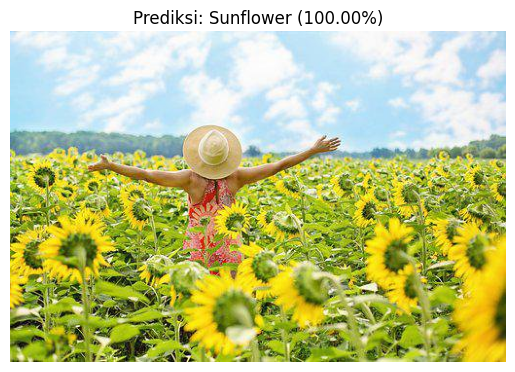

In [ ]:
interpreter = tf.lite.Interpreter(model_path="tflite/model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Load labels
with open("tflite/label.txt", "r") as f:
    labels = [line.strip() for line in f.readlines()]

# Fungsi preprocessing gambar
def preprocess_image(image):
    image = image.resize((150, 150)).convert('RGB')
    img_array = np.array(image, dtype=np.float32) / 255.0
    return np.expand_dims(img_array, axis=0)

# Fungsi prediksi
def predict(image):
    img = preprocess_image(image)
    interpreter.set_tensor(input_details[0]['index'], img)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details[0]['index'])[0]
    return np.argmax(output), output

# Upload gambar
uploaded = files.upload()

# Proses setiap gambar yang diunggah
for filename in uploaded.keys():
    image = Image.open(io.BytesIO(uploaded[filename]))

    # Prediksi
    predicted_index, output = predict(image)
    predicted_label = labels[predicted_index]
    confidence = output[predicted_index]

    # Tampilkan gambar dan hasil
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Prediksi: {predicted_label} ({confidence:.2%})")
    plt.show()
